In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install scikit-plot

In [0]:
#import statements
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch.utils import data
from torchsummary import summary
import pandas as pd
import numpy
import sys
import torch
from torch.nn import functional as F
import numpy as np
from torchtext import data
from torchtext import datasets
from torchtext.vocab import Vectors, GloVe
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchtext.datasets import TranslationDataset
from torchtext.data import Field, BucketIterator
from torch.autograd import Variable
from torchsummary import summary
from torchtext import data
import torchtext
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
import spacy
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import random
import math
import time
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# path 
os.chdir('/content/drive/My Drive/DL_Group/Assignments/Assignment_2')

## DATA LOADING AND PREPROCESSING

In [0]:
dataset_loc = 'Data/Q2/train_data.csv'
raw_data = pd.read_csv(dataset_loc)
np.random.shuffle(raw_data.values)
stop_words = list(set(stopwords.words('english')))
stop_words.extend(list(set(string.punctuation)))
spacy_en = spacy.load('en')
sentiments = {'worry' : 0, 'happiness' : 1, 'relief' : 2, 'boredom' : 3, 'neutral' : 4, 'love' : 5, 'anger' : 6, 'empty' : 7, 'surprise' : 8, 'fun' : 9, 'enthusiasm' : 10, 'hate' : 11, 'sadness' : 12}

In [0]:
def convert_to_encoding(labels):
  for i in range(len(labels)):
    labels[i] = sentiments[labels[i]]
  return labels

In [0]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
    
contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

In [0]:
def preprocess_sentence(sentence):
  sentence=replace_contractions(sentence)
  sentence = re.sub(r'(?:\@|https?\://)\S+', '', sentence).strip()
  sentence = word_tokenize(sentence)  
  stemmer = SnowballStemmer('english')
  sentence = [(stemmer.stem(i)).lower() for i in sentence]
  sentence = [i for i in sentence if i not in cachedStopWords]
  return ' '.join(sentence)

In [0]:
def preprocess(sentences):
  for i in range(len(sentences)):
    sentences[i] = preprocess_sentence(sentences[i])
  return sentences

In [0]:
reviews = preprocess(list(raw_data['content']))
labels = convert_to_encoding(list(raw_data['sentiment']))

In [0]:
train_x = reviews[:24000]
train_y = labels[:24000]
train = pd.concat([pd.Series(train_x, name = 'content'), pd.Series(train_y, name = 'sentiment')], axis = 1)

In [0]:
val_x = reviews[24000:]
val_y = labels[24000:]
val = pd.concat([pd.Series(val_x, name = 'content'), pd.Series(val_y, name = 'sentiment')], axis = 1)

In [0]:
train.to_csv('Data/Q2/train.csv', index=False)
val.to_csv('Data/Q2/val.csv', index=False)

In [0]:
TEXT = data.Field(sequential = True, tokenize = 'spacy')
LABEL = data.LabelField(dtype = torch.long, sequential = False)

In [0]:
train_data, val_data = data.TabularDataset.splits(
    path = 'Data/Q2/', train = 'train.csv', 
    validation = 'val.csv', format = 'csv', skip_header = True, 
    fields = [('Text', TEXT), ('Label', LABEL)]
)

In [0]:
print(len(train_data), len(val_data))

24000 6000


In [0]:
glove_file = 'Data/Q2/glove.6B.300d.txt'

TEXT.build_vocab(train_data, vectors = torchtext.vocab.Vectors(glove_file))
LABEL.build_vocab(train_data)


# import dill
# with open("Data/Q2/TEXT.Field","wb")as f:
#      dill.dump(TEXT,f)
# with open("Data/Q2/LABEL.Field","wb")as f:
#      dill.dump(LABEL,f)

# with open("Data/Q2/TEXT.Field","rb")as f:
#      TEXT=dill.load(f)
# with open("Data/Q2/LABEL.Field","rb")as f:
#      LABEL=dill.load(f)


In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 256 ## CHANGE BATCH SIZE HERE TO CHANGE IT IN THE ITERATOR
embedding_weights = TEXT.vocab.vectors
embedding_weights.cpu()
vocab_size = len(TEXT.vocab)
embedding_length = 300
output_size = 13
train_iter, valid_iter = data.BucketIterator.splits(
    (train_data, val_data), sort_key = lambda x: len(x.Text),
    batch_size = batch_size,
    device = device)

## LSTM + ATTENTION

In [0]:
# LSTM MODEL + ATTENTION
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np

class AttentionModel(torch.nn.Module):
  def __init__(self, hidden_size, output_size, vocab_size, embedding_length, embedding_weights, num_layers, bidirectional, dropout):
    super(AttentionModel, self).__init__()
    
    """
    Arguments
    ---------
    batch_size : Size of the batch which is same as the batch_size of the data returned by the TorchText BucketIterator
    output_size : 2 = (pos, neg)
    hidden_sie : Size of the hidden_state of the LSTM
    vocab_size : Size of the vocabulary containing unique words
    embedding_length : Embeddding dimension of GloVe word embeddings
    weights : Pre-trained GloVe word_embeddings which we will use to create our word_embedding look-up table 
    
    --------
    
    """
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.vocab_size = vocab_size
    self.embedding_length = embedding_length
    self.embedding_weights = embedding_weights
    self.num_layers = num_layers
    self.num_dir = 2 if bidirectional else 1
    self.bidirectional = bidirectional
    self.dropout = dropout

    # Embeding Layer
    self.embedding = nn.Embedding(self.vocab_size, self.embedding_length, padding_idx = 0)
    self.embedding.weight = nn.Parameter(self.embedding_weights, requires_grad = False)

    self.lstm = nn.LSTM(self.embedding_length, self.hidden_size, num_layers = self.num_layers, bidirectional = self.bidirectional, dropout = self.dropout)

    self.linear = nn.Linear(self.num_layers * self.num_dir * self.hidden_size, self.output_size)
    self.W_s1 = nn.Linear(2*hidden_size, 350)
    self.W_s2 = nn.Linear(350, 30)
    self.fc_layer = nn.Linear(30*2*hidden_size, 2000)
    self.label = nn.Linear(2000, output_size)
  
    self.softmax = nn.Softmax()

  def attention_net(self, lstm_output,final_state):

    """ 
    Now we will incorporate Attention mechanism in our LSTM model. In this new model, we will use attention to compute soft alignment score corresponding
    between each of the hidden_state and the last hidden_state of the LSTM. We will be using torch.bmm for the batch matrix multiplication.
    
    Arguments
    ---------
    
    lstm_output : Final output of the LSTM which contains hidden layer outputs for each sequence.
    final_state : Final time-step hidden state (h_n) of the LSTM
    
    ---------
    
    Returns : It performs attention mechanism by first computing weights for each of the sequence present in lstm_output and and then finally computing the
          new hidden state.
          
    Tensor Size :
          hidden.size() = (batch_size, hidden_size, num_layer)
          lstm_output.size() = (batch_size, num_seq, hidden_size)
          attn_weights.size() = (batch_size, num_seq, num_layer)
          soft_attn_weights.size() = (batch_size, num_seq * num_layer)
          new_hidden_state.size() = (batch_size, hidden_size, num_layer)            
    """
    if bidirectional==False:
      
      hidden = final_state.permute(1, 2, 0)
      attn_weights = torch.bmm(lstm_output, hidden)
      soft_attn_weights = F.softmax(attn_weights.flatten(start_dim = 1), 1)
      new_hidden_state = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.reshape(attn_weights.shape))
      
      return new_hidden_state.flatten(start_dim = 1)
    else:
      #for bidirection- true
      attn_weight_matrix = self.W_s2(F.tanh(self.W_s1(lstm_output)))
      attn_weight_matrix = attn_weight_matrix.permute(0, 2, 1)
      attn_weight_matrix = F.softmax(attn_weight_matrix, dim=2)
      return attn_weight_matrix
    
  def forward(self, x):
    x = x.permute(1, 0)
    batch_size = x.shape[0]
    inp = self.embedding(x)
    inp = inp.permute(1, 0, 2)

    h_0 = Variable(torch.zeros(self.num_layers * self.num_dir, batch_size, self.hidden_size).cuda())
    c_0 = Variable(torch.zeros(self.num_layers * self.num_dir, batch_size, self.hidden_size).cuda())
    out, (h_n, c_n) = self.lstm(inp, (h_0, c_0))
    out=out.permute(1,0,2)
    # print("out")
    # print(out.shape)
    # print("h_n")
    # print(h_n.shape)
    # print("inp")
    # print(inp.shape)
    # print("h_0")
    # print(h_0.shape)
    
    #for bidirection- false
    if bidirectional==False:
      attn_output = self.attention_net(out,h_n)
      labels = self.linear(attn_output)
      output = self.softmax(labels)
      return labels,output
    
    else:
      attn_weight_matrix = self.attention_net(out,h_n)
      hidden_matrix = torch.bmm(attn_weight_matrix, out)
      fc_out = self.fc_layer(hidden_matrix.view(-1, hidden_matrix.size()[1]*hidden_matrix.size()[2]))
      logits = self.label(fc_out)
      output = self.softmax(logits)
      return logits,output
    

FINAL MAIN RUN -> LSTM

In [0]:
# FINAL RUN -. LSTM
import os
import time
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import numpy as np


def clip_gradient(model, clip_value):
    params = list(filter(lambda p: p.grad is not None, model.parameters()))
    for p in params:
        p.grad.data.clamp_(-clip_value, clip_value)
    
def train_model(model, train_iter, epoch):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.cuda()
    optim = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))
    steps = 0
    model.train()
    for idx, batch in enumerate(train_iter):
        text = batch.Text
        target = batch.Label
        target = torch.autograd.Variable(target).long()
        if torch.cuda.is_available():
            text = text.cuda()
            target = target.cuda()
        optim.zero_grad()
        prediction,pred_prob = model(text)
      #if using softmax
        # loss = loss_fn(pred_prob, target)
        # num_corrects = (torch.max(pred_prob, 1)[1].view(target.size()).data == target.data).sum()
        loss = loss_fn(prediction, target)
        num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).float().sum()
        acc = 100.0 * num_corrects/len(batch)
        loss.backward()
        clip_gradient(model, 1e-1)
        optim.step()
        steps += 1
        
        # if steps % 100 == 0:
        #     print (f'Epoch: {epoch+1}, Idx: {idx+1}, Training Loss: {loss.item():.4f}, Training Accuracy: {acc.item(): .2f}%')
        
        total_epoch_loss += loss.item()
        total_epoch_acc += acc.item()
        
    return total_epoch_loss/len(train_iter), total_epoch_acc/len(train_iter)

def eval_model(model, val_iter):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(val_iter):
            text = batch.Text
            target = batch.Label            
            target = torch.autograd.Variable(target).long()
            if torch.cuda.is_available():
                text = text.cuda()
                target = target.cuda()
            prediction,pred_prob = model(text)
          #if using softmax
            # loss = loss_fn(pred_prob, target)
            # num_corrects = (torch.max(pred_prob, 1)[1].view(target.size()).data == target.data).sum()
            loss = loss_fn(prediction, target)
            num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).sum()
            acc = 100.0 * num_corrects/len(batch)
            total_epoch_loss += loss.item()
            total_epoch_acc += acc.item()

    return total_epoch_loss/len(val_iter), total_epoch_acc/len(val_iter)
	

learning_rate = 2e-5
num_epochs = 20
hidden_size = 32
num_layers = 3
# batch_size change from iterator 
bidirectional = True
momentum = 0.9
dropout = 0.5

model = AttentionModel(hidden_size, output_size, vocab_size, embedding_length, embedding_weights, num_layers, bidirectional, dropout)
loss_fn = F.cross_entropy
pbar = tqdm(range(num_epochs))
train_acc_list=[]
val_acc_list=[]
train_loss_list=[]
val_loss_list=[]
best_val_accuracy=0
best_epoch=0
for epoch in range(num_epochs):
    train_loss, train_acc = train_model(model, train_iter, epoch)
    val_loss, val_acc = eval_model(model, valid_iter)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    torch.save(model,"Outputs/Q2/test-final/lr-2e-5_bidir-t_3lay_32hid"+str(epoch)+".pt")
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%')
    if(val_acc>best_val_accuracy):
      best_val_accuracy=val_acc
      best_epoch=epoch
print(best_epoch,best_val_accuracy)

In [0]:
# quick evaluation of model
modeltest=torch.load("Outputs/Q2/test-final/lr-2e-5_bidir-t_3lay_32hid"+str(10)+".pt")
# train_loss, train_acc = train_model(modeltest, train_iter)
val_loss, val_acc = eval_model(modeltest, valid_iter)
print(val_acc)

**LOSS PLOTS, CONFUSION MATRIX, ROC CURVES**
FOR LSTM MODEL

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:118: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Loss: 1.328, Train Acc: 53.58%, Val. Loss: 2.241311, Val. Acc: 24.48%
[[1017  136  121  173   34    9   30    0    0    0    0    1    0]
 [ 811  218   87  127   42    2   20    1    0    0    0    0    0]
 [ 631   82   80  103   43    1   12    1    0    0    0    0    0]
 [ 331   47   35  124   13    1    9    1    0    0    0    0    0]
 [ 229   34   55   52   17    0    4    1    0    0    0    0    0]
 [ 211   44   23   34   17    4    5    0    0    0    0    1    0]
 [ 133   18   15   47   15    1    5    0    0    0    0    0    0]
 [ 146   23   16   34   10    0    2    0    0    0    0    0    0]
 [ 129   16   17   26    8    0    3    0    0    0    0    0    0]
 [  81   23    6   13    1    0    1    1    0    0    0    0    0]
 [  56    7    9   10    7    1    2    0    0    0    0    0    0]
 [  21    5    2    1    0    0    0    0    0    0    0    0    0]
 [  14    0    0    0    1    0    0    0    0    0    0    0    0]]


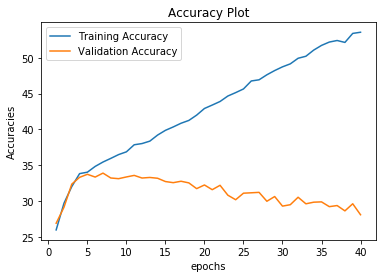

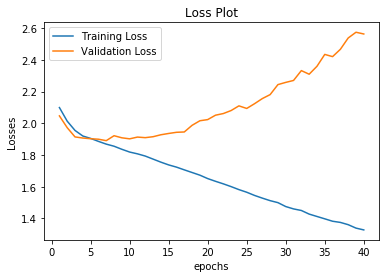

ypred
0
ytarget
7
yprobpred
[0.22333397 0.10743228 0.14125824 0.11547861 0.06851794 0.09245991
 0.03594816 0.08609004 0.04604445 0.02226202 0.03553351 0.01146883
 0.01417199]


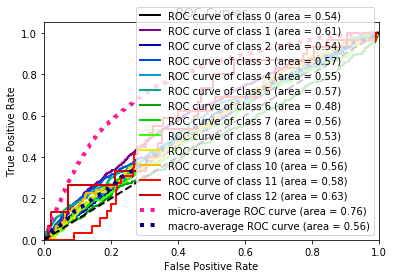

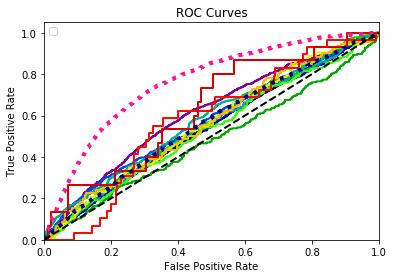

In [0]:
iterfortest = data.BucketIterator.splits(
    (val_data), sort_key = lambda x: len(x.Text),
    batch_size=batch_size,
    device = device)
def eval_modeltest(model, val_iter):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.eval()
    pred=[]
    targ=[]
    probpred=[]
    with torch.no_grad():
        for idx, batch in enumerate(val_iter):
            text = batch.Text
            target = batch.Label            
            target = torch.autograd.Variable(target).long()
            if torch.cuda.is_available():
                text = text.cuda()
                target = target.cuda()
            prediction,pred_prob = model(text)
            loss = loss_fn(prediction, target)
            num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).sum()
            acc = 100.0 * num_corrects/len(batch)
            total_epoch_loss += loss.item()
            total_epoch_acc += acc.item()
            # print(torch.max(prediction, 1)[1])
            # print(prediction.shape)
            # print(pred_prob.shape)
            sss=torch.max(prediction.cpu(), 1)[1]
            targ.extend(target.cpu().numpy())
            pred.extend(sss.numpy())
            probpred.extend(pred_prob.cpu().numpy())
    return pred,targ,probpred
####### PUT UR MODEL HERE
modeltest=torch.load("Outputs/Q2/test-6174/lr-2e-5_bidir-t_3lay_32hid"+str(best_epoch)+".pt")
# train_loss, train_acc = train_model(modeltest, train_iter, 1)
val_loss, val_acc = eval_model(modeltest, valid_iter)
print(f' Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%')
ypred, ytarget,yprobpred = eval_modeltest(modeltest, valid_iter)


#confusion matrix
from sklearn.metrics import confusion_matrix
a=confusion_matrix(ytarget, ypred)
print(a)

#ACCURACY PLOTS
# print(train_acc_list)
# print(val_acc_list)
# print(train_loss_list)
# print(val_loss_list)
import matplotlib.pyplot as plt 
epochnum=list(range(1,num_epochs+1))
plt.plot(epochnum,train_acc_list,label = "Training Accuracy")
plt.plot(epochnum,val_acc_list,label = "Validation Accuracy")
# naming the x axis 
plt.xlabel('epochs') 
# naming the y axis 
plt.ylabel('Accuracies') 
# giving a title to my graph 
plt.title('Accuracy Plot')
# show a legend on the plot 
plt.legend()
# function to show the plot 
plt.show() 

#LOSS PLOTS
import matplotlib.pyplot as plt2 
epochnum=list(range(1,num_epochs+1))
plt2.plot(epochnum,train_loss_list,label = "Training Loss")
plt2.plot(epochnum,val_loss_list,label = "Validation Loss")
# naming the x axis 
plt2.xlabel('epochs') 
# naming the y axis 
plt2.ylabel('Losses') 
# giving a title to my graph 
plt2.title('Loss Plot')
# show a legend on the plot 
plt2.legend()
# function to show the plot 
plt2.show() 

# print("ypred")
# print((ypred[0]))
# print("ytarget")
# print((ytarget[0]))
# print("yprobpred")
# print(yprobpred[0])

#ROC CURVE
import scikitplot as skplt
skplt.metrics.plot_roc(ytarget, yprobpred)
plt.show()
import scikitplot as skplt
skplt.metrics.plot_roc(ytarget, yprobpred)
plt.legend("")
plt.show()

## RNN + ATTENTION


In [0]:
# RNN MODEL + ATTENTION
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np

class rnnAttentionModel(torch.nn.Module):
  def __init__(self, hidden_size, output_size, vocab_size, embedding_length, embedding_weights, num_layers, bidirectional, dropout):
    super(rnnAttentionModel, self).__init__()
    
    """
    Arguments
    ---------
    batch_size : Size of the batch which is same as the batch_size of the data returned by the TorchText BucketIterator
    output_size : 2 = (pos, neg)
    hidden_sie : Size of the hidden_state of the LSTM
    vocab_size : Size of the vocabulary containing unique words
    embedding_length : Embeddding dimension of GloVe word embeddings
    weights : Pre-trained GloVe word_embeddings which we will use to create our word_embedding look-up table 
    
    --------
    
    """
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.vocab_size = vocab_size
    self.embedding_length = embedding_length
    self.embedding_weights = embedding_weights
    self.num_layers = num_layers
    self.num_dir = 2 if bidirectional else 1
    self.bidirectional = bidirectional
    self.dropout = dropout

    # Embeding Layer
    self.embedding = nn.Embedding(self.vocab_size, self.embedding_length, padding_idx = 0)
    self.embedding.weight = nn.Parameter(self.embedding_weights, requires_grad = False)

    self.rnn = nn.RNN(self.embedding_length, self.hidden_size, num_layers = self.num_layers, bidirectional = self.bidirectional, dropout = self.dropout)

    self.linear = nn.Linear(self.num_layers * self.num_dir * self.hidden_size, self.output_size)
    self.W_s1 = nn.Linear(2*hidden_size, 350)
    self.W_s2 = nn.Linear(350, 30)
    self.fc_layer = nn.Linear(30*2*hidden_size, 2000)
    self.label = nn.Linear(2000, output_size)
  
    self.softmax = nn.Softmax()

  def attention_net(self, lstm_output,final_state):

    """ 
    Now we will incorporate Attention mechanism in our LSTM model. In this new model, we will use attention to compute soft alignment score corresponding
    between each of the hidden_state and the last hidden_state of the LSTM. We will be using torch.bmm for the batch matrix multiplication.
    
    Arguments
    ---------
    
    lstm_output : Final output of the LSTM which contains hidden layer outputs for each sequence.
    final_state : Final time-step hidden state (h_n) of the LSTM
    
    ---------
    
    Returns : It performs attention mechanism by first computing weights for each of the sequence present in lstm_output and and then finally computing the
          new hidden state.
          
    Tensor Size :
          hidden.size() = (batch_size, hidden_size, num_layer)
          lstm_output.size() = (batch_size, num_seq, hidden_size)
          attn_weights.size() = (batch_size, num_seq, num_layer)
          soft_attn_weights.size() = (batch_size, num_seq * num_layer)
          new_hidden_state.size() = (batch_size, hidden_size, num_layer)            
    """
    if bidirectional==False:
      
      hidden = final_state.permute(1, 2, 0)
      attn_weights = torch.bmm(lstm_output, hidden)
      soft_attn_weights = F.softmax(attn_weights.flatten(start_dim = 1), 1)
      new_hidden_state = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.reshape(attn_weights.shape))
      
      return new_hidden_state.flatten(start_dim = 1)
    else:
      #for bidirection- true
      attn_weight_matrix = self.W_s2(F.tanh(self.W_s1(lstm_output)))
      attn_weight_matrix = attn_weight_matrix.permute(0, 2, 1)
      attn_weight_matrix = F.softmax(attn_weight_matrix, dim=2)
      return attn_weight_matrix
    
  def forward(self, x):
    x = x.permute(1, 0)
    batch_size = x.shape[0]
    inp = self.embedding(x)
    inp = inp.permute(1, 0, 2)

    h_0 = Variable(torch.zeros(self.num_layers * self.num_dir, batch_size, self.hidden_size).cuda())
    # c_0 = Variable(torch.zeros(self.num_layers * self.num_dir, batch_size, self.hidden_size).cuda())
    out, (h_n) = self.rnn(inp, (h_0))
    out=out.permute(1,0,2)
    
    #for bidirection- false
    if bidirectional==False:
      attn_output = self.attention_net(out,h_n)
      labels = self.linear(attn_output)
      output = self.softmax(labels)
      return labels,output
    
    else:
      attn_weight_matrix = self.attention_net(out,h_n)
      hidden_matrix = torch.bmm(attn_weight_matrix, out)
      fc_out = self.fc_layer(hidden_matrix.view(-1, hidden_matrix.size()[1]*hidden_matrix.size()[2]))
      logits = self.label(fc_out)
      output = self.softmax(logits)
      return logits,output
    

FINAL MAIN RUN -> RNN

In [0]:
# FINAL RUN -. RNN
import os
import time
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import numpy as np


def clip_gradient(model, clip_value):
    params = list(filter(lambda p: p.grad is not None, model.parameters()))
    for p in params:
        p.grad.data.clamp_(-clip_value, clip_value)
    
def train_model(model, train_iter, epoch):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.cuda()
    optim = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))
    steps = 0
    model.train()
    for idx, batch in enumerate(train_iter):
        text = batch.Text
        target = batch.Label
        target = torch.autograd.Variable(target).long()
        if torch.cuda.is_available():
            text = text.cuda()
            target = target.cuda()
        optim.zero_grad()
        prediction,pred_prob = model(text)
      #if using softmax
        # loss = loss_fn(pred_prob, target)
        # num_corrects = (torch.max(pred_prob, 1)[1].view(target.size()).data == target.data).sum()
        loss = loss_fn(prediction, target)
        num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).float().sum()
        acc = 100.0 * num_corrects/len(batch)
        loss.backward()
        clip_gradient(model, 1e-1)
        optim.step()
        steps += 1
        # if steps % 100 == 0:
        #     print (f'Epoch: {epoch+1}, Idx: {idx+1}, Training Loss: {loss.item():.4f}, Training Accuracy: {acc.item(): .2f}%')
        total_epoch_loss += loss.item()
        total_epoch_acc += acc.item()
        
    return total_epoch_loss/len(train_iter), total_epoch_acc/len(train_iter)

def eval_model(model, val_iter):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(val_iter):
            text = batch.Text
            target = batch.Label            
            target = torch.autograd.Variable(target).long()
            if torch.cuda.is_available():
                text = text.cuda()
                target = target.cuda()
            prediction,pred_prob = model(text)
          #if using softmax
            # loss = loss_fn(pred_prob, target)
            # num_corrects = (torch.max(pred_prob, 1)[1].view(target.size()).data == target.data).sum()
            loss = loss_fn(prediction, target)
            num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).sum()
            acc = 100.0 * num_corrects/len(batch)
            total_epoch_loss += loss.item()
            total_epoch_acc += acc.item()

    return total_epoch_loss/len(val_iter), total_epoch_acc/len(val_iter)
	

learning_rate = 2e-5
num_epochs = 40
hidden_size = 32
num_layers = 3
# batch_size change from iterator 
bidirectional = True
momentum = 0.9
dropout = 0.5

model = rnnAttentionModel(hidden_size, output_size, vocab_size, embedding_length, embedding_weights, num_layers, bidirectional, dropout)
loss_fn = F.cross_entropy
pbar = tqdm(range(num_epochs))
train_acc_list=[]
val_acc_list=[]
train_loss_list=[]
val_loss_list=[]
best_val_accuracy=0
best_epoch=0
for epoch in range(num_epochs):
    train_loss, train_acc = train_model(model, train_iter, epoch)
    val_loss, val_acc = eval_model(model, valid_iter)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    torch.save(model,"Outputs/Q2/test-6174/lr-2e-5_bidir-t_3lay_32hidRNN"+str(epoch)+".pt")
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%')
    if(val_acc>best_val_accuracy):
      best_val_accuracy=val_acc
      best_epoch=epoch
print(best_epoch,best_val_accuracy)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type rnnAttentionModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 01, Train Loss: 2.130, Train Acc: 25.59%, Val. Loss: 2.215328, Val. Acc: 25.97%
Epoch: 02, Train Loss: 2.051, Train Acc: 27.92%, Val. Loss: 2.315784, Val. Acc: 27.16%
Epoch: 03, Train Loss: 1.997, Train Acc: 30.02%, Val. Loss: 2.199496, Val. Acc: 30.45%
Epoch: 04, Train Loss: 1.973, Train Acc: 31.23%, Val. Loss: 2.128927, Val. Acc: 30.55%
Epoch: 05, Train Loss: 1.955, Train Acc: 32.11%, Val. Loss: 2.187417, Val. Acc: 29.55%
Epoch: 06, Train Loss: 1.942, Train Acc: 32.65%, Val. Loss: 2.137161, Val. Acc: 30.77%
Epoch: 07, Train Loss: 1.934, Train Acc: 32.46%, Val. Loss: 2.196203, Val. Acc: 30.54%
Epoch: 08, Train Loss: 1.929, Train Acc: 33.06%, Val. Loss: 2.274948, Val. Acc: 29.69%
Epoch: 09, Train Loss: 1.918, Train Acc: 33.46%, Val. Loss: 2.285236, Val. Acc: 29.75%
Epoch: 10, Train Loss: 1.916, Train Acc: 33.20%, Val. Loss: 2.128809, Val. Acc: 31.15%
Epoch: 11, Train Loss: 1.907, Train Acc: 33.61%, Val. Loss: 2.187661, Val. Acc: 30.65%
Epoch: 12, Train Loss: 1.907, Train Acc: 33

In [0]:
modeltest=torch.load("Outputs/Q2/test-6174/lr-2e-5_bidir-t_3lay_32hidRNN"+str(9)+".pt")
# train_loss, train_acc = train_model(modeltest, train_iter, 1)
val_loss, val_acc = eval_model(modeltest, valid_iter)
train_loss, train_acc = eval_model(modeltest, train_iter)
print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%')

# Outputs/Q2/test-6174/lr-2e-5_bidir-t_3lay_32hidRNN9.pt

**LOSS PLOTS, CONFUSION MATRIX, ROC CURVES**
FOR RNN MODEL

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:118: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Loss: 1.824, Train Acc: 36.72%, Val. Loss: 2.356386, Val. Acc: 23.99%
[[871 198 241  74  48   6  33  46   4   0   0   0   0]
 [689 290 146  53  59   8  23  38   2   0   0   0   0]
 [502 137 168  49  57   2  13  23   1   0   0   1   0]
 [277  67  88  62  27   3  11  25   1   0   0   0   0]
 [178  48  97  24  24   1   5  14   1   0   0   0   0]
 [169  57  53  19  22   4   7   8   0   0   0   0   0]
 [120  23  37  25  17   2   7   3   0   0   0   0   0]
 [119  30  34  14  17   3   3  11   0   0   0   0   0]
 [105  25  32  17  12   1   4   2   1   0   0   0   0]
 [ 69  27  14   8   2   2   1   3   0   0   0   0   0]
 [ 43  13  13   6   8   2   3   4   0   0   0   0   0]
 [ 17   7   3   1   0   0   0   1   0   0   0   0   0]
 [ 11   1   1   0   2   0   0   0   0   0   0   0   0]]


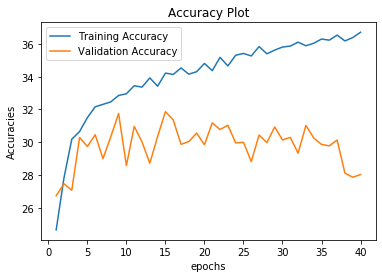

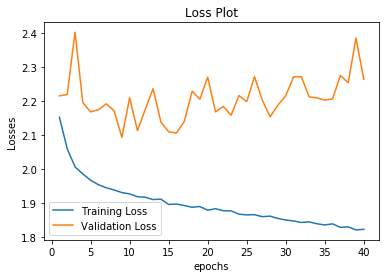

ypred
0
ytarget
7
yprobpred
[0.25641492 0.12141184 0.11357224 0.11395495 0.0329595  0.07737616
 0.02179611 0.13014814 0.05786513 0.02155209 0.03534355 0.00744432
 0.01016112]


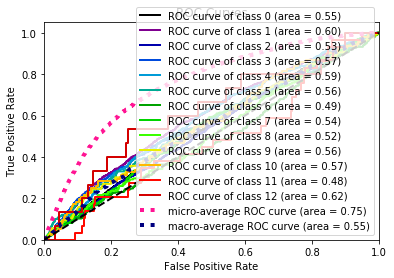

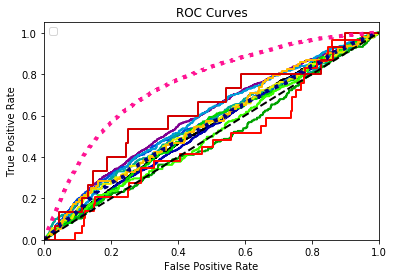

In [0]:
iterfortest = data.BucketIterator.splits(
    (val_data), sort_key = lambda x: len(x.Text),
    batch_size=batch_size,
    device = device)
def eval_modeltest(model, val_iter):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.eval()
    pred=[]
    targ=[]
    probpred=[]
    with torch.no_grad():
        for idx, batch in enumerate(val_iter):
            text = batch.Text
            target = batch.Label            
            target = torch.autograd.Variable(target).long()
            if torch.cuda.is_available():
                text = text.cuda()
                target = target.cuda()
            prediction,pred_prob = model(text)
            loss = loss_fn(prediction, target)
            num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).sum()
            acc = 100.0 * num_corrects/len(batch)
            total_epoch_loss += loss.item()
            total_epoch_acc += acc.item()
            # print(torch.max(prediction, 1)[1])
            # print(prediction.shape)
            # print(pred_prob.shape)
            sss=torch.max(prediction.cpu(), 1)[1]
            targ.extend(target.cpu().numpy())
            pred.extend(sss.numpy())
            probpred.extend(pred_prob.cpu().numpy())
    return pred,targ,probpred

modeltest=torch.load("Outputs/Q2/test-6174/lr-2e-5_bidir-t_3lay_32hid"+str(best_epoch)+".pt")
# train_loss, train_acc = train_model(modeltest, train_iter, 1)
val_loss, val_acc = eval_model(modeltest, valid_iter)
train_loss, train_acc = eval_model(modeltest, train_iter)
print(f' Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%')
ypred, ytarget,yprobpred = eval_modeltest(modeltest, valid_iter)


#confusion matrix
from sklearn.metrics import confusion_matrix
a=confusion_matrix(ytarget, ypred)
print(a)
# import scikitplot as skplt
# skplt.metrics.plot_confusion_matrix(ytarget, ypred)
# plt.show()

#ACCURACY PLOTS
# print(train_acc_list)
# print(val_acc_list)
# print(train_loss_list)
# print(val_loss_list)
import matplotlib.pyplot as plt 
epochnum=list(range(1,num_epochs+1))
plt.plot(epochnum,train_acc_list,label = "Training Accuracy")
plt.plot(epochnum,val_acc_list,label = "Validation Accuracy")
plt.xlabel('epochs') 
plt.ylabel('Accuracies') 
plt.title('Accuracy Plot')
plt.legend()
plt.show() 

#LOSS PLOTS
import matplotlib.pyplot as plt2 
epochnum=list(range(1,num_epochs+1)) 
plt2.plot(epochnum,train_loss_list,label = "Training Loss")
plt2.plot(epochnum,val_loss_list,label = "Validation Loss")
plt2.xlabel('epochs') 
plt2.ylabel('Losses') 
plt2.title('Loss Plot')
plt2.legend()
plt2.show() 

# print("ypred")
# print((ypred[0]))
# print("ytarget")
# print((ytarget[0]))
# print("yprobpred")
# print(yprobpred[0])

#ROC CURVE
import scikitplot as skplt
skplt.metrics.plot_roc(ytarget, yprobpred)
plt.show()
import scikitplot as skplt
skplt.metrics.plot_roc(ytarget, yprobpred)
plt.legend("")
plt.show()

# CSV FILE GENERATOR WITH SENTIMENT CLASSES
Assumption - The input test file is a csv with text headers as "id" and "content".

In [0]:
# preparing the test data
dataset_loc = 'Data/Q2/train2_data.csv'
raw_data = pd.read_csv(dataset_loc)
np.random.shuffle(raw_data.values)
stop_words = list(set(stopwords.words('english')))
stop_words.extend(list(set(string.punctuation)))
spacy_en = spacy.load('en')
sentiments = {'worry' : 0, 'happiness' : 1, 'relief' : 2, 'boredom' : 3, 'neutral' : 4, 'love' : 5, 'anger' : 6, 'empty' : 7, 'surprise' : 8, 'fun' : 9, 'enthusiasm' : 10, 'hate' : 11, 'sadness' : 12}
inv_emo = dict(zip(sentiments.values(), sentiments.keys())) 

#preprocessing and embedding the test data
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
def preprocess_sentence(sentence):
  sentence=replace_contractions(sentence)
  sentence = re.sub(r'(?:\@|https?\://)\S+', '', sentence).strip()
  sentence = word_tokenize(sentence)  
  stemmer = SnowballStemmer('english')
  sentence = [(stemmer.stem(i)).lower() for i in sentence]
  sentence = [i for i in sentence if i not in cachedStopWords]
  return ' '.join(sentence)
def preprocess(sentences):
  for i in range(len(sentences)):
    sentences[i] = preprocess_sentence(sentences[i])
  return sentences


reviews = preprocess(list(raw_data['content']))
ids = (list(raw_data['id']))
test = pd.concat([pd.Series(reviews, name = 'content'), pd.Series(ids, name = 'id')], axis = 1)
test.to_csv('Data/Q2/testfilegenerate.csv', index=False)
TEXT = data.Field(sequential = True, tokenize = 'spacy')
LABEL = data.LabelField(dtype = torch.long, sequential = False)
test_data = data.TabularDataset(
    path = 'Data/Q2/testfilegenerate.csv',format = 'csv', skip_header = True, 
    fields = [('Text', TEXT), ('Label', LABEL)]
)

glove_file = 'Data/Q2/glove.6B.300d.txt'
TEXT.build_vocab(test_data, vectors = torchtext.vocab.Vectors(glove_file))
LABEL.build_vocab(test_data)
batch_size = 50
embedding_weights = TEXT.vocab.vectors
embedding_weights.cuda()
vocab_size = len(TEXT.vocab)
embedding_length = 300
output_size = 13
test_iter = data.BucketIterator(
    (test_data), sort_key = lambda x: len(x.Text),
    batch_size = batch_size,
    device = device)

#finding predictions
def eval_modeltest(model, test_iter):
    pred=[]
    with torch.no_grad():
        for idx, batch in enumerate(test_iter):
            text = batch.Text
            if torch.cuda.is_available():
                text = text.cuda()
            prediction,pred_prob = model(text)
            sss=torch.max(prediction.cpu(), 1)[1]
            pred.extend(sss.numpy())
    return pred

#load best model 
modelcsv=torch.load("Outputs/Q2/test-6174/lr-2e-5_bidir-t_3lay_32hid"+str(8)+".pt")
all_preds=eval_modeltest(modelcsv, test_iter)
import csv
csv_rows=[]

# generating labels in csv
with open('Outputs/Q2/csv/generated.csv', mode='w') as testcsvfile:
    csv_writer = csv.writer(testcsvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(['ID','Class'])
    for i in range(len(all_preds)):
      csv_writer.writerow([str(i+1),inv_emo[all_preds[i]]])